# Test if GPU works correctly

In [1]:
import tensorflow as tf

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.test.gpu_device_name())

Num GPUs Available:  1
/device:GPU:0


2022-07-03 20:48:50.748754: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-03 20:48:52.063108: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /device:GPU:0 with 30966 MB memory:  -> device: 0, name: Quadro GV100, pci bus id: 0000:01:00.0, compute capability: 7.0


In [3]:
tf.debugging.set_log_device_placement(True)

# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0


2022-07-03 20:48:56.904570: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30966 MB memory:  -> device: 0, name: Quadro GV100, pci bus id: 0000:01:00.0, compute capability: 7.0


tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [4]:
# Place tensors on the CPU
with tf.device('/CPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Run on the GPU
c = tf.matmul(a, b)
print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [5]:
# reset flags
tf.debugging.set_log_device_placement(False)

# Test if quickstart works correctly

In [6]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt

In [ ]:
ds_era5 = xr.load_dataset('data/perdigao_era5_2020.nc')
ds_era5['vel100'] = np.sqrt(ds_era5['u100'] ** 2 +  ds_era5['v100'] ** 2)
ds_era5['vel100'].attrs = {'long_name': '100 meter horizontal wind speed', 'units': 'm/s'}
ds_era5

In [29]:
ds_era5.attrs

{'Conventions': 'CF-1.6'}

In [8]:
ds_low_res_sample = xr.load_dataset('data_samples/perdigao_low_res_1H_2020_01.nc')
ds_low_res_sample

<xarray.Dataset>
Dimensions:          (time: 744, yf: 96, xf: 96)
Coordinates:
  * time             (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
    height           float32 100.0
  * xf               (xf) float64 7.76e+03 7.92e+03 ... 2.28e+04 2.296e+04
  * yf               (yf) float64 7.76e+03 7.92e+03 ... 2.28e+04 2.296e+04
Data variables:
    absolute_height  (time, yf, xf) float32 258.1 258.5 254.7 ... 324.4 310.8
    std              (time, yf, xf) float32 0.09803 0.1249 ... 1.198 1.081
    temp             (time, yf, xf) float32 284.3 284.4 284.3 ... 285.9 286.0
    u                (time, yf, xf) float32 -2.41 -2.445 -2.446 ... 6.734 5.853
    v                (time, yf, xf) float32 0.3384 0.3794 0.3742 ... 3.921 5.324
    vel              (time, yf, xf) float32 2.436 2.476 2.477 ... 7.862 8.012
Attributes:
    site:         Perdigao, Portugal
    description:  160m x 160m x 40m LES simulation
    copyright:    GE Renewable Energy

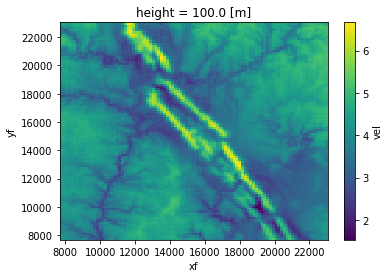

In [9]:
ds_low_res_sample['vel'].mean('time').plot()

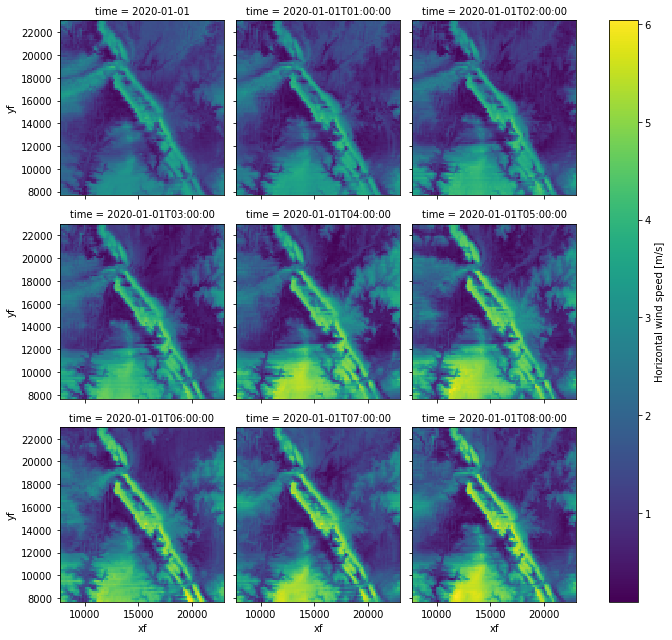

In [10]:
ds_low_res_sample['vel'].isel(time=range(9)).plot(col='time', col_wrap=3)

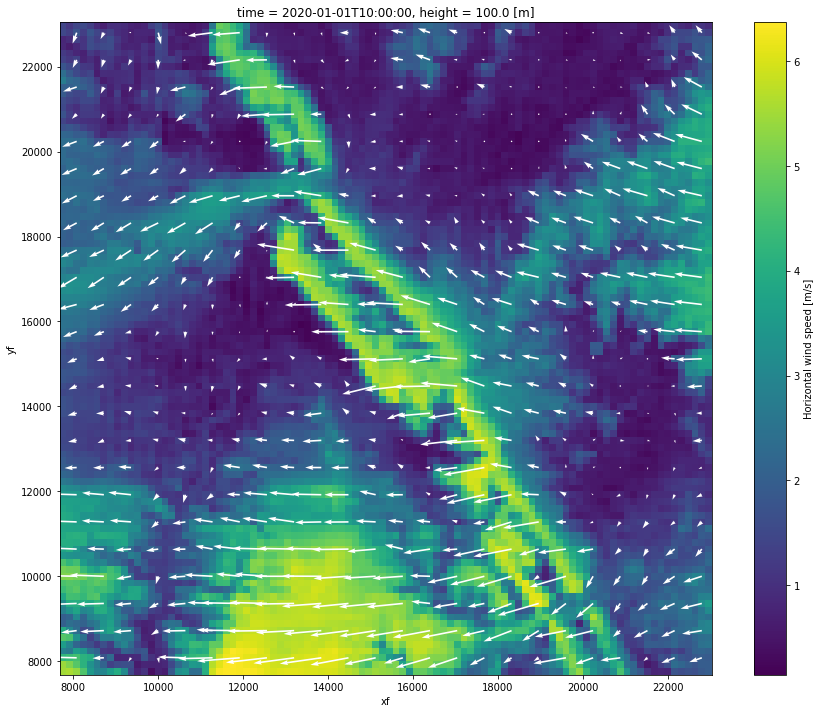

In [11]:
fig, ax = plt.subplots(figsize=(15, 12))

xy_resample = np.array(range(0, 96, 4)) + 2
time_id = 10

ds_low_res_sample['vel'].isel(time=time_id).plot(ax=ax)
(ds_low_res_sample
    .isel(time=time_id, xf=xy_resample, yf=xy_resample)
    .plot.quiver(x='xf', y='yf', u='u', v='v', ax=ax, pivot='tail', color='white'))
ax.set_aspect('equal')